In [164]:
import pandas as pd
import numpy as np 

In [165]:
preds=np.load('preds.npy')
threshold = [
    0.7827917, 0.56434, 0.30756, 0.56771123, 0.29417764, 0.25892453,
    0.32996163, 0.3038406, 0.24855, 0.52959282, 0.55619836, 0.4969851
]
preds = (preds >= threshold).astype(int)
au_labels = [
    "au1", "au12", "au15", "au17", "au2", "au20",
    "au25", "au26", "au4", "au5", "au6", "au9"
]
preds=pd.DataFrame(preds,columns=au_labels)
preds.head()

,au1,au12,au15,au17,au2,au20,au25,au26,au4,au5,au6,au9
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,1,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,1,0,1,0,1,1,0,0,0,0
4,0,0,0,0,1,0,1,1,0,0,0,1


In [166]:
def detect_aus(preds):
    columns_with_1 = preds.apply(lambda row: list(row.index[row == 1]), axis=1)
    return columns_with_1
au_lists=detect_aus(preds)
# (Counter({'surprise': 500,
#           'fear': 500,
#           'neutral': 500,
#           'sad': 500,
#           'disgust': 500,
#           'happy': 500,
#           'anger': 500}),

In [167]:
def map_au_to_emotion(au_row):
    emotions = {
        'anger': ['au4', 'au5', 'au17'],
        'Sad': ['au1', 'au4', 'au15'],
        'happy': ['au12', 'au6'],
        'Fear': ['au1', 'au2', 'au5', 'au20'],
        'Disgust': ['au9', 'au15'],
        'Surprise': ['au1', 'au2', 'au5', 'au26']
    }
    
    percent = []
    for emotion in emotions:
        match_length = len(set(emotions[emotion]).intersection(set(au_row)))
        perc = match_length / len(emotions[emotion])
        percent.append(perc)
    
    max_percent = max(percent)
    
    if max_percent == 0:
        return percent, "Neutral"  # Return 'Neutral' if all percentages are zero
    
    # Find the emotion with the highest percentage match
    max_emotion = list(emotions.keys())[percent.index(max_percent)]
    
    return percent, max_emotion

In [168]:

predictions=[]
for pred in au_lists:
    percen,emotion=map_au_to_emotion(pred)
    predictions.append(emotion)

In [169]:
predictions=[pred.lower() for pred in predictions]

In [170]:
real=np.load('real.npy')

In [171]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(real,predictions))

              precision    recall  f1-score   support

       anger       0.23      0.14      0.18       500
     disgust       0.23      0.23      0.23       500
        fear       0.15      0.13      0.14       500
       happy       0.33      0.58      0.42       500
     neutral       0.15      0.05      0.07       500
         sad       0.17      0.03      0.05       500
    surprise       0.19      0.44      0.27       500

    accuracy                           0.23      3500
   macro avg       0.21      0.23      0.19      3500
weighted avg       0.21      0.23      0.19      3500



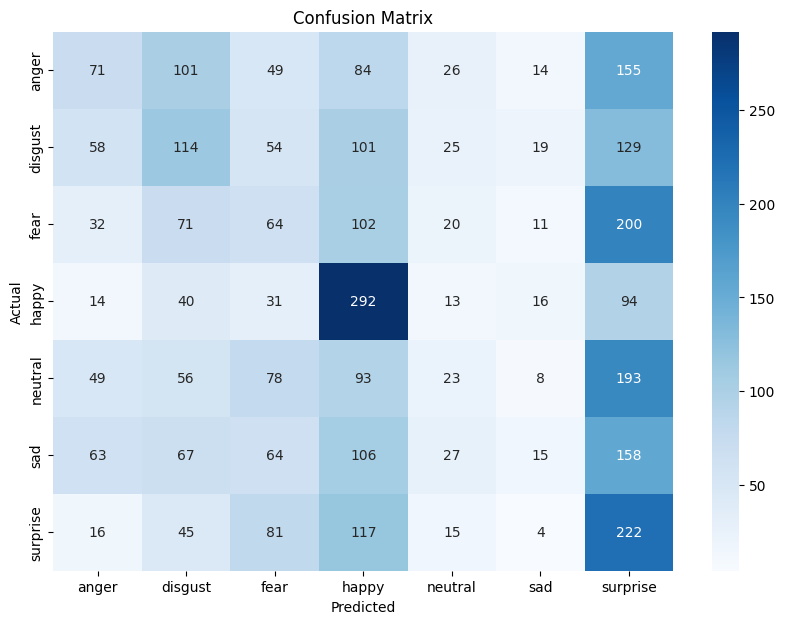

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(real, predictions):
    # Get unique labels from the real data and predictions
    labels = np.unique(np.concatenate([real, predictions]))

    # Generate the confusion matrix
    cm = confusion_matrix(real, predictions, labels=labels)
    
    # Set up the matplotlib figure
    plt.figure(figsize=(10, 7))
    
    # Create a heatmap using seaborn
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    
    # Add labels, title, and formatting
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    
    # Display the plot
    plt.show()



plot_confusion_matrix(real, predictions)
